<h1><center>
How Salary Caps Impact Professional Sports
</center></h1>
<h2><center>
A case study into the English Premier League and Leicester City
</center></h2>
<h3><center>
Marcel Colvin
</center></h3>

# Introduction:
When Leicester City won the English Premier League it sent shocks through the not only the football world, but the sports world. This is one of the greatest upsets in the history of sport, to put it in American football terms, it would be like if the Cleveland Browns, who just went 0-16, with a mediocre draft, won the Superbowl next year. In the current footballing system, where football teams are owned by Oligarchs and foreign billionaires, it seems that the team that can afford to buy the best parts always wins. Looking at Manchester City, Chelsea, and PSG, it is obvious that after these clubs were bought out by their respective owners, things changed. Former first division minnows, these clubs quickly turned into powerhouse clubs always looking to win the league and European trophies, rather than just surviving the relegation zone. Leicester City, is not immune to the foreign involvement, they are owned by King Power, the largest duty-free retailers in Thailand. Unlike clubs like Chelsea and Manchester City, Leicester City's owners did not infuse the club with big name players and new infrastructure. Before the 2015-16 season began, they were actually picked by most pundits to be relegated (finish 18-20th in the league). This story showed sports fans that in a league dominated by money, there are still intangibles that make sports worth watching. 

Having watched sports in America, I wondered why events like these never happen. Owners of teams change all the time, but seldom do teams shoot up from the bottom of the table to win the trophy. This is because almost all American sports institute salary caps. These are either a hard cap on how much a team can pay its players or a luxury tax for every dollar a team pays over the cap, thus discouraging overspending. In American sports there are also such underdog stories, but because of the salary cap leveling the playing field, these stories will never be quite as shocking as Leicester City's win.

**My main focuses for this report are:**

Would imposing a salary cap in the English Premier League help to make the league more balanced?

Do Salary Caps level the playing field?

Does money predict winning a league with no salary cap? What factors do predict winning a league?

What factors led to Leicester City to win? Were they infused with money?

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import re
import mpld3
import statsmodels.api as sm
from mpld3 import plugins
import sqlite3 as sql
plt.style.use('ggplot')
%matplotlib inline
db = sql.connect("FootballData.sqlite")

C:\Users\marce\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Premier League is Dominated by a few good clubs (1992-Present):

If you follow football, you know that the winners of most leagues are pre-determined. In Germany, Bayern Munich has won the first division title 13 of the past 20 years. In Spain, Real Madrid or Barcelona have won the title 17 of the past 20 years. It is no different in England, as either Manchester United, Chelsea, Arsenal, or Manchester City have won 19 of the past 20 first division titles. The one being Leicester City's 2015-16 victory. Since the founding of the Premier League in 1992, which was created by the top 20 clubs in the English League in order to gain more lucrative television deals and to cut out the English FA (their association). An American comparison would be all the American Football teams leaving the NFL and forming a new entity where they were in full control. This is where I begin to look at the results of the Premier League, essentially when the money started really flowing to the teams.

In the top 4 divisions of English Football there are 92 teams, and only 24 teams have ever come in 1st place in the top flight of English Football, since 1895. Looking at the league more recently, when the big clubs broke off from the English Football Association and became publicly traded commodities instead of clubs owned by their fans, there are significantly less winners. The Premier League age has brought only 6 different winners total in 25 years. Looking at the English First-Division 25 years before 1992, we see relatively the same looking bar graph, with different clubs. Judging from this, one could assume that the large amounts of TV and foreign oligarch money has done nothing to impact the league. The league was already dominated by a few clubs and will continue to be. The key to understanding the difference is that the clubs that are the most successful in the Premier League are not the ones that were successful in the 25 years before the Premier Leagues founding in 1992. The money created success for some clubs, but also made a moon door, in which some successful clubs of the 70s and 80s fell through (Derby County, Leeds United, Nottingham Forest,...). The money made English football into a coalition of super teams/corporations, that has been much harder to break into than in former times. Football had been consistently becoming more popular among supporters and in the 1980s most clubs became seen more as businesses run by CEO's rather than owned by the supporters. Television and adspace were being sold and money was being made. The imbalance of football seemed to stem from the money and slowly grew and grew, until the point we are at today, where 4 clubs win  over 90% of the time. The Premier League is one of the hardest trophies for a small club to win, unless they are infused with billions of dollars from a generous owner. Not having a salary cap in this league has only made player prices sky rocket. The buyout clauses of many players have gone well over 100 million pounds and is only increasing as time goes on. 

In [3]:
titles = pd.read_sql_query("select * from titles", db)

C:\Users\marce\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


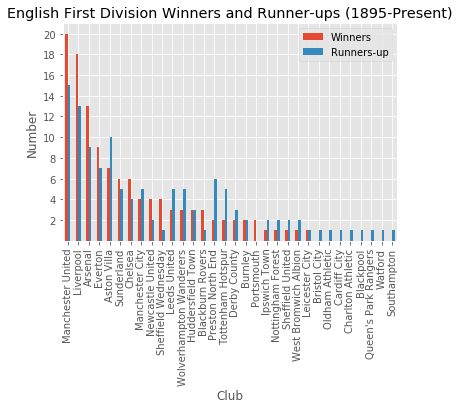

In [4]:
ax = titles.plot("Club", ["Winners"] + ["Runners-up"], kind = 'bar', yticks = [2,4,6,8,10,12,14,16,18,20])
ax.set(ylabel="Number", title = "English First Division Winners and Runner-ups (1895-Present)")
plt.show()

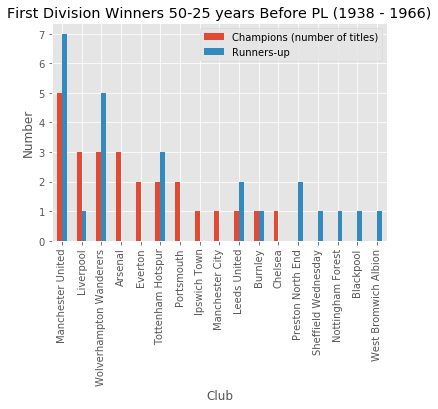

In [306]:
full_standings = pd.read_sql_query("select * from full_EPL_winners",db)
before_pl2 = full_standings.iloc[41:66]
a = pd.DataFrame(before_pl2["Champions (number of titles)"].value_counts()).reset_index()
b = pd.DataFrame(before_pl2["Runners-up"].value_counts()).reset_index()
x = a.merge(b, on = 'index', how = 'outer')
ax = x.plot("index", kind = 'bar')
ax.set(xlabel="Club", ylabel = "Number", title = "First Division Winners 50-25 years Before PL (1938 - 1966)")
plt.show()

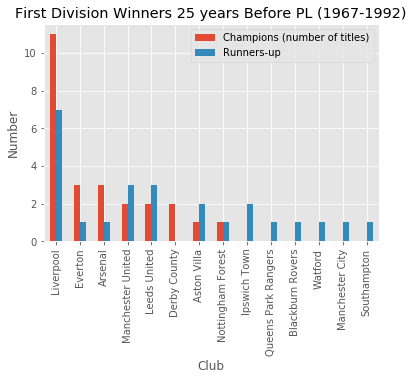

In [7]:
before_pl1 = full_standings.iloc[66:91]
a = pd.DataFrame(before_pl1["Champions (number of titles)"].value_counts()).reset_index()
b = pd.DataFrame(before_pl1["Runners-up"].value_counts()).reset_index()
x = a.merge(b, on = 'index', how = 'outer')
ax = x.plot("index", kind = 'bar')
ax.set(xlabel="Club", ylabel = "Number", title = "First Division Winners 25 years Before PL (1967-1992)")
plt.show()

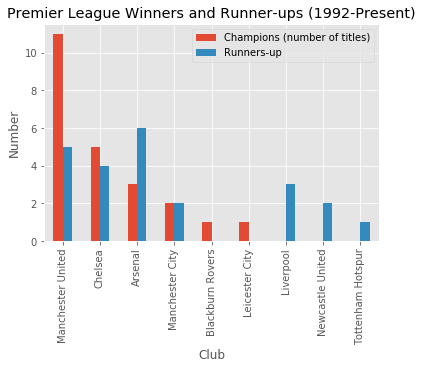

In [8]:
pl_full = full_standings.iloc[91:]
a = pd.DataFrame(pl_full["Champions (number of titles)"].value_counts()).reset_index()
b = pd.DataFrame(pl_full["Runners-up"].value_counts()).reset_index()
x = a.merge(b, on = 'index', how = 'outer')
ax = x.plot("index", kind = 'bar')
ax.set(xlabel="Club", ylabel = "Number", title = "Premier League Winners and Runner-ups (1992-Present)")
plt.show()

## Winners in the NBA, MLS, NFL, and MLB since 1992

Comparing the number of distinct winners in these American sports leagues to the Premier League over around the same time will allow us to see the difference in distribution in leagues with salary caps and the Premier League. The NBA has had a salary cap since 1984, the MLS has had one since its inaugural season in 1996, the NFL has had once since 1994 and the MLB since 1997.

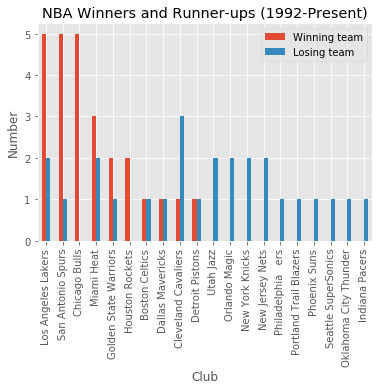

In [9]:
NBA_winners = pd.read_sql_query('select * from NBA_winners where Year >= 1992', db)
a = pd.DataFrame(NBA_winners["Winning team"].value_counts()).reset_index()
b = pd.DataFrame(NBA_winners["Losing team"].value_counts()).reset_index()
x = a.merge(b, on = 'index', how = 'outer')
ax = x.plot("index", kind = 'bar')
ax.set(xlabel="Club", ylabel = "Number", title = "NBA Winners and Runner-ups (1992-Present)")
plt.show()

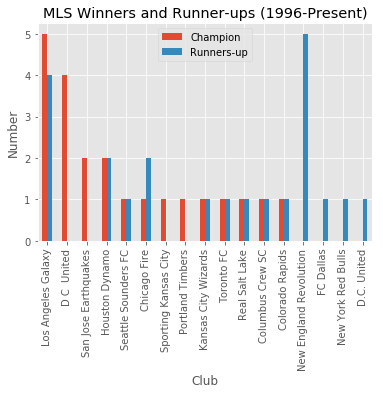

In [10]:
MLS_winners = pd.read_sql_query("select * from MLS_winners",db)
a = pd.DataFrame(MLS_winners["Champion"].value_counts()).reset_index()
b = pd.DataFrame(MLS_winners["Runners-up"].value_counts()).reset_index()
x = a.merge(b, on = 'index', how = 'outer')
ax = x.plot("index", kind = 'bar')
ax.set(xlabel="Club", ylabel = "Number", title = "MLS Winners and Runner-ups (1996-Present)")
plt.show()

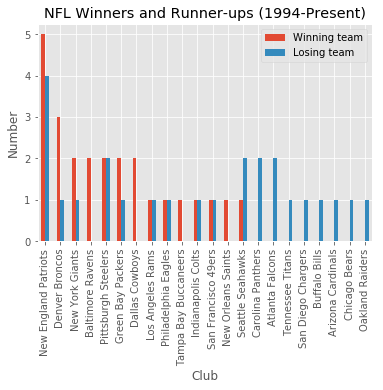

In [11]:
NFL_winners = pd.read_sql_query("select * from NFL_winners where Date >= 1994", db)
a = pd.DataFrame(NFL_winners["Winning team"].value_counts()).reset_index()
b = pd.DataFrame(NFL_winners["Losing team"].value_counts()).reset_index()
x = a.merge(b, on = 'index', how = 'outer')
ax = x.plot("index", kind = 'bar')
ax.set(xlabel="Club", ylabel = "Number", title = "NFL Winners and Runner-ups (1994-Present)")
plt.show()

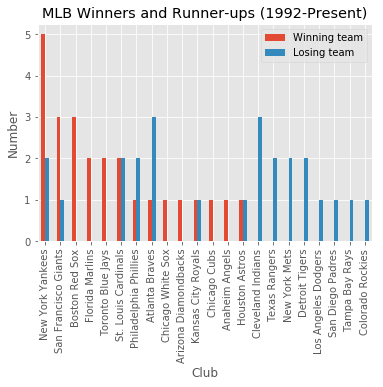

In [12]:
MLB_winners = pd.read_sql_query('select * from MLB_winners where Year >= 1992', db)
a = pd.DataFrame(MLB_winners["Winning team"].value_counts()).reset_index()
b = pd.DataFrame(MLB_winners["Losing team"].value_counts()).reset_index()
x = a.merge(b, on = 'index', how = 'outer')
ax = x.plot("index", kind = 'bar')
ax.set(xlabel="Club", ylabel = "Number", title = "MLB Winners and Runner-ups (1992-Present)")
plt.show()

In [13]:
pl_percent_by_top4 = 21/sum(pl_full["Champions (number of titles)"].value_counts())
NBA_percent_by_top4 = 18/sum(NBA_winners["Winning team"].value_counts())
MLS_percent_by_top4 = 13/sum(MLS_winners["Champion"].value_counts())
NFL_percent_by_top4 = 12/sum(NFL_winners["Winning team"].value_counts())
MLB_percent_by_top4 = 13/sum(MLB_winners["Winning team"].value_counts())
percent_dict = {"Premier League":pl_percent_by_top4, "NBA":NBA_percent_by_top4, "MLS":MLS_percent_by_top4, "NFL":NFL_percent_by_top4, "MLB":MLB_percent_by_top4}
print("Ratio of Championships won by the Top 4 teams that win the most")
pd.DataFrame(percent_dict, index = np.arange(1))

Ratio of Championships won by the Top 4 teams that win the most


,MLB,MLS,NBA,NFL,Premier League
0,0.52,0.590909,0.692308,0.48,0.913043


In comparing these distributions to the premier league, we can see that in the same or fewer years, each of the leagues with a salary cap have each had between 10 and 15 distinct winners and over 20 distinct teams have made it to the final 2. This is compared to the premier league, who has had 6 winners and only 9 teams that have made it to the runner-up position. Initially when looking at this data we can see that the salary cap clearly makes these leagues more fair. We still see that some clubs in these sports, such as the Yankees, Patriots, and LA Galaxy have been more successful than other clubs, but never for too long. This is the main impact of salary caps, although they do not always work, since some players value being on a winning team over their paycheck, eventually the money always evens the playing field. Players only have 12-17 years of playing at the highest level, and they eventually have their priorities, money for the rest of their lives. 

When we look at the distributions of winners of leagues with a salary cap, we can see that they mirror the English Football First Division from 1938-1967. These were the days before money was flowing into sports and the playing field was more even. This is because before 1960, there was a wage cap in English Football. It was not neccessary, since players were getting paid marginally more than minimum wage anyways. Most clubs at this time spent around 50 English pounds per week on their entire squads, but after 1961, the flood gates were open for wages to skyrocket. And this is why we see the number of distinct championship caliber clubs shrinking.

When we look at the ratio of championships won by the top 4 teams over the years, the 4 top teams in most leagues have won 50-70% of the time. This means that over around 25 years, depending on the league, 4 teams have won it between 3 and 4 times each, if this was uniformly distributed. In the Premier League, it sits around 92%. This means that each team has won over 5 championships each, and barely any other teams outside 4 of them have won. As a sport that is growing in viewership and popularity in the United States, it seems that the league is always a toss-up between 4-6 teams rather than giving any other teams the light of day.

In conclusion, in order to better sport and make it more fair, I believe that imposing a salary cap would bring the Premier League back to its roots. It would set a bar that would even the playing field and allow for new champions. I fear that this may never happen since in English Football there is always the fear of relegation. This fear of being relegated to the second division makes it so that no club wants to be regulated in their buying of good players. The clubs would much rather pay more than their rivals in order to make more money by staying in the Premier League and not being relegated to the lower divisions. Therefore, even though a salary cap would help to even the playing field, it seems the only fix to this problem is more football obsessed billionaires infusing their favorite clubs with their fortunes.

## What are the most important factors in winning the English Premier League

### Wages investigation

Using detailed Premier League Data from the 2000-01 season to the 2015-16 season, my first hypothesis for the factor that matters the most in winning is the wages that players are paid. This statistic directly shows what each club thinks its players are worth and usually the best players, who are capable of winning, cost the most.

My first step was to normalize the data. This is because as time goes on, the price of the best players are constantly increasing, 50 million could win the league in the year 2000, but would put the team in the bottom 5 wages today. The normalization is necessary in order to see how much each club spends with respect to the mean. 

Looking at the graphs, there is definitely a positive linear relationship between points and wages. These two variables have a $R^2$ of 0.62, which is not great, but wages do explain a good part of who wins. The first graph, which is colored by the winner, shows that although there is a relationship between points and wages, there is not a relationship between wages and winning. The winners regularly spend at least 1 standard deviation more than the mean, except one team, Leicester City, who spent half a standard deviation less than the mean. When looking at the second graph, colored by whether they made it into the top 4, it is clear that wage is a much better predictor of making it into the top 4, since most teams that spent over the first standard deviation made it to the top 4.


In [131]:
season_stats = [0]*16
for i in range(0,16): #so I don't have to waste time re-getting the data
    season_stats[i]=pd.read_sql_query("select * from pl_season_stats_{}".format(i+1), db)
total_stats = season_stats[0]
for i in range(1,16):
    total_stats = total_stats.append(season_stats[i])
total_stats["total_pass"] = pd.to_numeric(total_stats["total_pass"])
total_stats["total_scoring_att"] = pd.to_numeric(total_stats["total_scoring_att"])
total_stats["total_tackle"] = pd.to_numeric(total_stats["total_tackle"])
total_stats["total_offside"] = pd.to_numeric(total_stats["total_offside"])
total_stats["dispossessed"] = pd.to_numeric(total_stats["dispossessed"])
total_stats["touches"] = pd.to_numeric(total_stats["touches"])
total_stats["att_ibox_goal"] = pd.to_numeric(total_stats["att_ibox_goal"])
total_stats["att_obox_goal"] = pd.to_numeric(total_stats["att_obox_goal"])
total_stats["big_chance_missed"] = pd.to_numeric(total_stats["big_chance_missed"])
total_stats = total_stats.reset_index(drop = True)

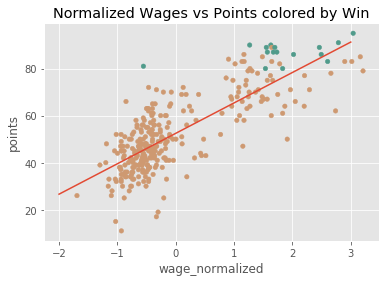

In [18]:
cmap = {True:'#509b8b', False: "#ce9971"}
ax = total_stats.plot("wage_normalized", "points", kind = 'scatter', c = [cmap.get(c,'black') for c in total_stats["Won"]])
mod = sm.OLS(total_stats["points"], sm.add_constant(total_stats["wage_normalized"]), missing = 'drop').fit()
plt.plot(np.arange(-2,3.5), mod.params.const + mod.params["wage_normalized"] *np.arange(-2,3.5))

ax.set(title ='Normalized Wages vs Points colored by Win')
plt.show()

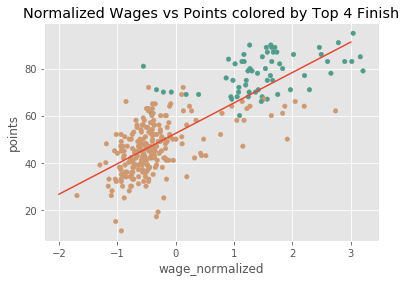

In [19]:
ax = total_stats.plot("wage_normalized", "points", kind = 'scatter', c = [cmap.get(c,'black') for c in total_stats["Top4"]])
mod = sm.OLS(total_stats["points"], sm.add_constant(total_stats["wage_normalized"]), missing = 'drop').fit()
plt.plot(np.arange(-2,3.5), mod.params.const + mod.params["wage_normalized"] *np.arange(-2,3.5))

ax.set(title ='Normalized Wages vs Points colored by Top 4 Finish')
plt.show()

In [20]:
mod.rsquared

0.62232374423258374

## What Statistics Predict the Number of Points a Team Earns?

### 2000-2016 OLS Model

After seeing that wage does have a positive relationship with the number of points earned, I decided to make an OLS model which attempts to predict the number of points with multiple statistics from <a href = https://www.premierleague.com/home>premierleague.com</a>. I used data from 2000-2016 for the first model, and used a more in-depth model, with more statistics from 2006-2016 for the second one.

In [21]:
import statsmodels.formula.api as smf
mod1 = smf.ols(formula = "points ~  total_yel_card + total_red_card + wage_normalized + goal_diff + clean_sheet" , data = total_stats, missing = 'drop')

In [22]:
mod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     849.5
Date:                Sat, 17 Mar 2018   Prob (F-statistic):          2.10e-177
Time:                        15:42:46   Log-Likelihood:                -897.43
No. Observations:                 313   AIC:                             1807.
Df Residuals:                     307   BIC:                             1829.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          46.7570      1.873     24.964      0.000      43.072      50.443
total_yel_card      0.0099      0.025      0.401      0.689      -0.039       0.059
total_red_card      0.1791      0.137      1.303      0.194      -0.091       0.450
wage_normalized     0.5204      0.415      1.255      0.211      -0.296       1.337
goal_diff           0.5793      0.020     29.090      0.000       0.540       0.619
clean_sheet         0.3899      0.091      4.306      0.000       0.212       0.568
==============================================================================
Omnibus:                        1.252   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.351
Skew:                           0.127   Prob(JB):                        0.509
Kurtosis:                       2.801   Cond. No.                         469.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From this generally model, we can see that the main predictors for points are the goal differential and clean sheet variables. This is unsurprising since scoring more and conceding less wins more games. The normalized wage variable was insignificant in this prediction, with a p-values of .211. This is surprising, but we continue and fit with more in-depth variables from 2006-16

### 2006-2016 OLS Model

In [23]:
total_stats2006_16 = total_stats[120:]
mod2 = smf.ols(formula = "points ~  total_yel_card + total_red_card + wage_normalized + goal_diff + clean_sheet + total_pass + total_scoring_att + total_tackle + total_offside+ touches + att_ibox_goal + att_obox_goal" , data = total_stats2006_16, missing = 'drop')
mod2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     237.3
Date:                Sat, 17 Mar 2018   Prob (F-statistic):          8.77e-106
Time:                        15:42:46   Log-Likelihood:                -565.37
No. Observations:                 199   AIC:                             1157.
Df Residuals:                     186   BIC:                             1200.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            34.9230      7.632      4.576      0.000      19.867      49.979
total_yel_card        0.0390      0.033      1.175      0.241      -0.027       0.105
total_red_card        0.1801      0.178      1.012      0.313      -0.171       0.531
wage_normalized       0.3448      0.583      0.592      0.555      -0.805       1.495
goal_diff             0.4695      0.052      9.066      0.000       0.367       0.572
clean_sheet           0.5354      0.156      3.430      0.001       0.227       0.843
total_pass         -6.63e-05      0.000     -0.195      0.846      -0.001       0.001
total_scoring_att    -0.0040      0.006     -0.645      0.520      -0.016       0.008
total_tackle         -0.0013      0.004     -0.335      0.738      -0.009       0.006
total_offside         0.0004      0.017      0.021      0.983      -0.032       0.033
touches               0.0002      0.000      0.548      0.584      -0.000       0.001
att_ibox_goal         0.1365      0.072      1.908      0.058      -0.005       0.278
att_obox_goal         0.3200      0.119      2.682      0.008       0.085       0.555
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.622
Skew:                           0.129   Prob(JB):                        0.733
Kurtosis:                       3.094   Cond. No.                     7.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Judging by this second linear model, we find that many variables added were un-necessary. The two main new variables that helped to predict were the goals from inside and outside the box, which essentially are the same as goal difference. Most of the p-values for the other added variables were large and therefore did not contribute anything to the actual regression with respect to points. This model we can see is the same, and none of these statistics were actually significant in the model to predict points.

## kNN analysis, can we predict from statistics the League Champions or a Top 4 finish?

In [24]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
total_stats_no_na = total_stats[['wage_normalized', 'goal_diff' , 'clean_sheet', 'total_yel_card', 'total_red_card','Top4']].dropna()
X = np.array(total_stats_no_na[['wage_normalized', 'goal_diff' , 'clean_sheet', 'total_yel_card', 'total_red_card']])
Y= np.array(total_stats_no_na['Top4'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
print(pred)
print(Y_test)
confusion_matrix(Y_test, pred)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1]


C:\Users\marce\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([[80,  3],
       [ 4, 17]], dtype=int64)

In [25]:
total_stats_no_na = total_stats[['wage_normalized', 'goal_diff' , 'clean_sheet', 'total_yel_card', 'total_red_card','Won']].dropna()
X = np.array(total_stats_no_na[['wage_normalized', 'goal_diff' , 'clean_sheet', 'total_yel_card', 'total_red_card']])
Y= np.array(total_stats_no_na['Won'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=30)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
print(pred)
print(Y_test)
confusion_matrix(Y_test, pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


array([[99,  1],
       [ 4,  0]], dtype=int64)

Judging by the kNN predictor on a random sample, it shows that this model predicts who does not win the league well and who makes the top 4 very well. Looking at the confusion matrices and the data used, we can see there were 21 teams in the top 4, and the data predicted 17 of them correctly and 4 incorrectly. It also misclassified 3 non-top 4 teams as top 4 teams. In the kNN classifier for the champion, the kNN classifier was much worse. There were 4 total winners and it classified none of them correctly and misclassified a loser as a winner. Our model is good for top 4 teams, but extremely bad for predicting the winner of the premier league.

# Leicester City Invesitgation: How did a Small Club win the Richest League in the World?

Leicester City had never won the English first division in its history until the 2015-16 season as is shown by the interactive plot below. The black lines in the plot indicate where the cut off is between the first division and second division, which has fluctuated between 16 and 22 since Leicester City has been in the league. Leicester City has only been in the top 10 spots around 10 times, and has an expected value through their history of finishing 22nd or 23rd. Their rank also has a variance of 100. Looking at the histogram, the distribution seems to be normally distributed, meaning that about 68% of the time, they will be in between 13th and 33rd in the English Leagues and about 95% of the time they will be within, 3rd and 43rd. Just judging on the fact this is a normal distribution and our data is over 120 years, this is not that far out of the realm of possibility. Sports data seems to fluctuate over time more aggressively than most normal plots, but looking at it in a macro sense, it seems to be normal. 

In [325]:
lc_standings = pd.read_sql_query("select * from lc_rank", db)
fig, ax = plt.subplots()
points = ax.plot_date(lc_standings["Year"], lc_standings["rank"], ls = '--', c = "#1358A1")
ax.set_xticks(np.arange(0,115, 5))
ax.set_xticklabels([])
ax.set_xlabel("Years")
plt.gca().invert_yaxis()
ax.plot([0,4],[16,16], 'k-', lw=1)
ax.plot([5,11],[18,18], 'k-', lw=1)
ax.plot([12,21],[20,20], 'k-', lw=1)
ax.plot([22,91],[22,22], 'k-', lw=1)
ax.plot([91,113],[20,20], 'k-', lw=1)
plt.ylabel("League Postition")
plt.title("Leicester City League Postition from 1894-2017")
plt.legend()
css = """
table
{
  border-collapse: collapse;
}
th
{
  color: #000000;
  background-color: #ffffff;
}
td
{
  background-color: #ffffff;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""
labels =[]
for i in range(0, len(lc_standings)):
    label = lc_standings.loc[[i], :]
    labels.append(str(label.to_html()))
pointlabs = plugins.PointHTMLTooltip(points[0],labels,
                                   voffset=10, hoffset=10, css = css)
plugins.clear(fig)
plugins.connect(fig, pointlabs)
mpld3.display()

In [320]:
print("Average Rank: {} ".format(np.average(lc_standings["rank"])))

Average Rank: 22.857142857142858 


In [321]:
print("Variance of Rank: {}".format(np.var(lc_standings["rank"])))

Variance of Rank: 100.12244897959185


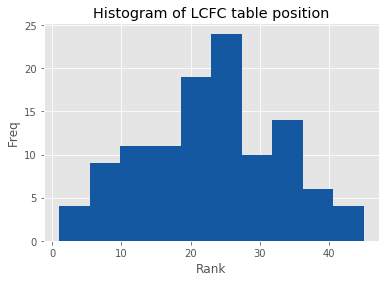

In [327]:
ax = lc_standings["rank"].plot(kind = 'hist', color = '#1358A1')
ax.set(xlabel = "Rank", ylabel = "Freq", title = "Histogram of LCFC table position")
plt.show()

### Wage Data For 2015-16 Season

Next I plotted the normalized wage data for the 2015-16 season, colored by the champion. We can see that 5 clubs spent around 1.5 standard deviations more than  the other clubs, but none of those clubs won. This graph is skewed to the edges,  meaning that few values are near the mean and most are far away from it. When we look at the graph colored by the top 4 clubs, we also see that the clubs that spent absurd amounts of money were not guaranteed a top 4 spot. The 3 clubs which spent the most money did not even make it to the top 4. This leads me to believe that the biggest clubs definitely underperformed, which we will look into in the further analysis of the season. 

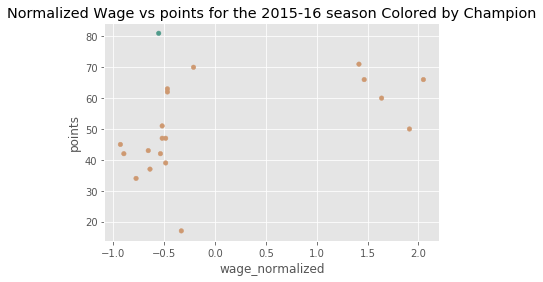

In [323]:
ax = season_stats[15].plot("wage_normalized", "points", kind = 'scatter', c = [cmap.get(c,'black') for c in total_stats["Won"]])
ax.set(title = "Normalized Wage vs points for the 2015-16 season Colored by Champion")
plt.show()

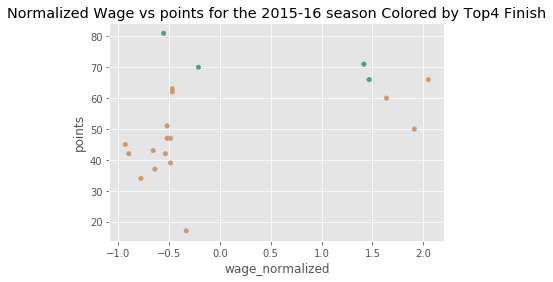

In [322]:
ax = season_stats[15].plot("wage_normalized", "points", kind = 'scatter', c = [cmap.get(c,'black') for c in total_stats["Top4"]])
ax.set(title = "Normalized Wage vs points for the 2015-16 season Colored by Top4 Finish")
plt.show()

### kNN model for the 2015-16 Season

Next we look at the kNN model for predicting the 2015-16 season and does the model we created predict the winner properly with the data given. First we predicted the champions, which the model was poor at predicting, and thus did not predict any club to be the champion. Then the model was used to predict the top 4 and it predicted all of the top 4 correctly. Judging by the fact that Leicester City was classified to be in the top 4, but not to win the league, it is safe to assume that they performed well enough to be the champion. A way to improve this algorithm would be to get the data from many more seasons that would make classifying the league champion much easier.

In [32]:
total_stats_no_na = total_stats[['wage_normalized', 'goal_diff' , 'clean_sheet', 'total_yel_card', 'total_red_card','Won']].dropna()
X = np.array(total_stats_no_na[['wage_normalized', 'goal_diff' , 'clean_sheet', 'total_yel_card', 'total_red_card']])
Y= np.array(total_stats_no_na['Won'])
X_test = X[-20:]
X_train = X[:293]
Y_test = Y[-20:]
Y_train = Y[:293]
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
print(Y_test)
print(pred)
confusion_matrix(Y_test, pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([[19,  0],
       [ 1,  0]], dtype=int64)

In [31]:
total_stats_no_na = total_stats[['wage_normalized', 'goal_diff' , 'clean_sheet', 'total_yel_card', 'total_red_card','Top4']].dropna()
X = np.array(total_stats_no_na[['wage_normalized', 'goal_diff' , 'clean_sheet', 'total_yel_card', 'total_red_card']])
Y= np.array(total_stats_no_na['Top4'])
X_test = X[-20:]
X_train = X[:293]
Y_test = Y[-20:]
Y_train = Y[:293]
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
print(Y_test)
print(pred)
confusion_matrix(Y_test, pred)

[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([[16,  0],
       [ 0,  4]], dtype=int64)

## Other Factors that Led to Leicester City's Victory

### Was it an Under-Performance by the Top 6?
#### Points Analysis
In order to see if Leicester City's Victory was accompanied by a failure in the top 6 clubs in the league, Tottenham, Manchester City, Manchester United, Arsenal, Chelsea, and Liverpool, we inspect the graphs and statistics below. Judging by the graph of points over time, we can see a significant drop from the normal height. This first graph has many NA values since Leicester was not in the first division for many years, so their point value was set to 0 for these years. From the statistics of average points vs points in 2015-16 season, we can see that the clubs that have recently become contenders, such as Manchester City and Tottenham Hotspur have a lower average, and actually were above their average this season. The other 4 top clubs were well below their expected point total. This graph and statistics show that the top 6 did underperform to their own expected values.

In [316]:
man_city_stats = total_stats[total_stats["Name"]=="manchester city"]
chelsea_stats = total_stats[total_stats["Name"]=="chelsea"]
man_u_stats = total_stats[total_stats["Name"]=="manchester united"]
liverpool_stats = total_stats[total_stats["Name"]=="liverpool"]
arsenal_stats = total_stats[total_stats["Name"]=="arsenal"]
tottenham_stats = total_stats[total_stats["Name"]=="tottenham hotspur"]
leicester_stats = total_stats[total_stats["Name"]=="leicester city"][["Year", "points", "goal_diff"]]
leicester_stats1 = leicester_stats.merge(pd.DataFrame(man_u_stats["Year"]), on = "Year",how =  'outer')
leicester_stats1 = leicester_stats1.fillna(0).sort_values("Year")

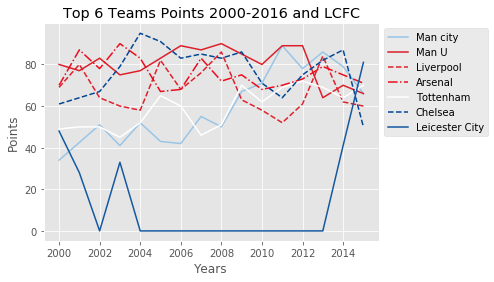

In [329]:
plt.plot(man_city_stats["Year"], man_city_stats["points"], c = "#99C5E7")
plt.plot(man_u_stats["Year"], man_u_stats["points"], c = '#DC1F29')
plt.plot(liverpool_stats["Year"], liverpool_stats["points"], c= '#E0202C', ls = 'dashed')
plt.plot(arsenal_stats["Year"], arsenal_stats["points"], c ='#EC0C1C', ls = '-.')
plt.plot(tottenham_stats["Year"], tottenham_stats["points"], c ='#FFFFFF' )
plt.plot(chelsea_stats["Year"], chelsea_stats["points"], c = '#034694', ls = 'dashed')
plt.plot(leicester_stats1["Year"], leicester_stats1["points"], c= '#1358A1')
plt.legend(["Man city", "Man U", "Liverpool", "Arsenal", "Tottenham", "Chelsea", "Leicester City"],loc="upper left", bbox_to_anchor=(1,1))
plt.title("Top 6 Teams Points 2000-2016 and LCFC")
plt.xlabel("Years")
plt.ylabel("Points")
plt.show()

In [248]:
points2015 = pd.read_sql_query("select Name, points from pl_season_stats_16 where Name = 'leicester city' or Name = 'arsenal' or Name = 'tottenham hotspur' or Name = 'manchester city' or Name = 'manchester united' or Name = 'liverpool' or Name = 'chelsea'",db)
pointsdf = pd.DataFrame({"manchester city":np.average(man_city_stats["points"]),"manchester united":np.average(man_u_stats["points"]),"liverpool":np.average(liverpool_stats["points"]),"arsenal":np.average(arsenal_stats["points"]),"tottenham hotspur":np.average(tottenham_stats["points"]),"chelsea":np.average(chelsea_stats["points"]),"leicester city":np.average(leicester_stats["points"])}, index = np.arange(1)).T
pointsdf = pointsdf.reset_index()
pointsdf.columns = ["Name","Average Points"]
pointsdf
pointsdf = pointsdf.merge(points2015, on = "Name", how = 'outer')
pointsdf.columns = ["Name","Average Points", "2015-16 Points"]
pointsdf

,Name,Average Points,2015-16 Points
0,arsenal,75.562500,71
1,chelsea,76.437500,50
2,leicester city,46.200000,81
3,liverpool,67.687500,60
4,manchester city,60.266667,66
5,manchester united,80.250000,66
6,tottenham hotspur,59.000000,70


#### Goal Difference Analysis
Next I did the same thing with goal differential. I expect this to mirror the graphs above and again replaced the NA data for Leicester City with 0s. Again, every single club, besides Tottenham and Manchester City, whose data is skewed because of poor performances early in the decade, is well below their expected goal differential. This again shows that these clubs were unable to pick up the points needed and win the tough games against smaller teams to win the league.

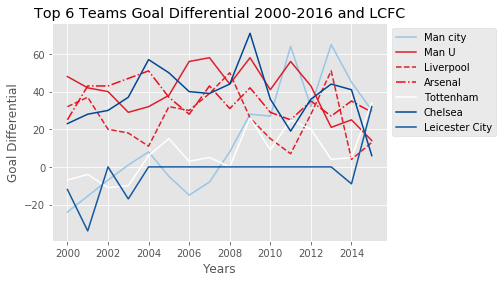

In [330]:
plt.plot(man_city_stats["Year"], man_city_stats["goal_diff"], c = "#99C5E7")
plt.plot(man_u_stats["Year"], man_u_stats["goal_diff"], c = '#DC1F29')
plt.plot(liverpool_stats["Year"], liverpool_stats["goal_diff"], c= '#E0202C', ls = 'dashed')
plt.plot(arsenal_stats["Year"], arsenal_stats["goal_diff"], c ='#EC0C1C', ls = '-.')
plt.plot(tottenham_stats["Year"], tottenham_stats["goal_diff"], c ='#FFFFFF' )
plt.plot(chelsea_stats["Year"], chelsea_stats["goal_diff"], c = '#034694')
plt.plot(leicester_stats1["Year"], leicester_stats1["goal_diff"], c= '#1358A1')
plt.legend(["Man city", "Man U", "Liverpool", "Arsenal", "Tottenham", "Chelsea", "Leicester City"],loc="upper left", bbox_to_anchor=(1,1))
plt.title("Top 6 Teams Goal Differential 2000-2016 and LCFC")
plt.xlabel("Years")
plt.ylabel("Goal Differential")
plt.show()

In [255]:
goal2015 = pd.read_sql_query("select Name, goal_diff from pl_season_stats_16 where Name = 'leicester city' or Name = 'arsenal' or Name = 'tottenham hotspur' or Name = 'manchester city' or Name = 'manchester united' or Name = 'liverpool' or Name = 'chelsea'",db)
goal_diffdf = pd.DataFrame({"manchester city":np.average(man_city_stats["goal_diff"]),"manchester united":np.average(man_u_stats["goal_diff"]),"liverpool":np.average(liverpool_stats["goal_diff"]),"arsenal":np.average(arsenal_stats["goal_diff"]),"tottenham hotspur":np.average(tottenham_stats["goal_diff"]),"chelsea":np.average(chelsea_stats["goal_diff"]),"leicester city":np.average(leicester_stats["goal_diff"])}, index = np.arange(1)).T
goal_diffdf = goal_diffdf.reset_index()
goal_diffdf.columns = ["Name","Average Goal Diff"]
goal_diffdf
goal_diffdf = goal_diffdf.merge(points2015, on = "Name", how = 'outer')
goal_diffdf.columns = ["Name","Average Goal Diff", "2015-16 Goal Diff"]
goal_diffdf

,Name,Average Goal Diff,2015-16 Goal Diff
0,arsenal,35.6250,29
1,chelsea,37.5625,6
2,leicester city,-8.0000,32
3,liverpool,25.8125,13
4,manchester city,16.6000,30
5,manchester united,40.3125,14
6,tottenham hotspur,7.5000,34


## Comparison with other PL Winners 
Knowing that the other clubs underperformed in the 2015-16 season, the next step is to see where they stand with other premier league winners. We have already seen that Leicester City spent well beneath any Premier League winner has ever spent relative to the rest of the league and won. Now looking first at their goal differential, we can see that it is the lowest of any winner since 2000. It is also almost 20 goals below average. Thus we can infer that they won many of their games by 1 or drew. From the graph of points of Premier League winners, we can see that they are not too far out of the expected, although have mildly fewer than average.

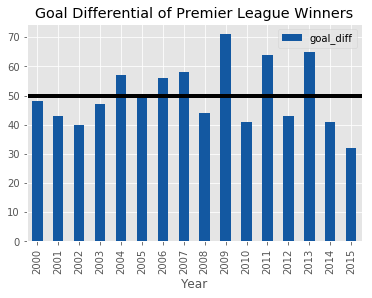

Average Goal Difference of PL winners: 50.0


In [399]:
winners = total_stats[total_stats["Won"] == True]
winners.plot(x = "Year", y="goal_diff", kind = 'bar', color = "#1358A1")
plt.plot([-1,16],[np.average(winners["goal_diff"]),np.average(winners["goal_diff"])], 'k-', lw=4)
plt.title("Goal Differential of Premier League Winners")
plt.show()
print("Average Goal Difference of PL winners: {}".format(np.average(winners["goal_diff"])))

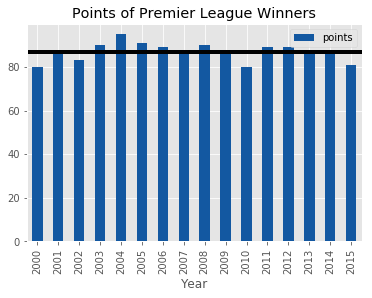

Average Points of PL winners: 86.875


In [400]:
winners.plot(x = "Year", y="points", kind = 'bar', color = "#1358A1")
plt.plot([-1,16],[np.average(winners["points"]),np.average(winners["points"])], 'k-', lw=4)
plt.title("Points of Premier League Winners")
plt.show()
print("Average Points of PL winners: {}".format(np.average(winners["points"])))

## How did their players play? Did the whole team score or did they just have a star player?
Looking at the graphs below of players on every team with minutes played over 1000, we can see that players on Leicester City scored more on average. This might lead us to assume that Leicester City scored more as a team, but their standard deviation is also the largest of every team. This means that they had a few select players, that scored a majority of their goals, while the rest got low numbers such as 1-3 goals. This is the same with pretty much all clubs, their variance is larger than the expected value per player. Therefore they were not involving more players in their goal scoring, they had a select few as most teams, who were clinical in front of goal. Looking at the average assists per player, we can see that these graphs have an equal or lower standard deviation than the mean. This means that more players are involved in goals, but this is the same across all clubs, meaning we can infer nothing about Leicester City's performance from these graphs.

In [401]:
import math
teams = ['arsenal', 'aston-villa', 'bournemouth', 'chelsea' ,'crystal-palace', 'everton','leicester-city', 'liverpool', 'manchester-city', 'manchester-united', 'newcastle-united', 'norwich-city',
         'southampton', 'stoke-city', 'sunderland', 'swansea-city', 'tottenham-hotspur', 'watford', 'west-bromwich-albion', 'west-ham-united']
season_stats_2015 ={}
team_stats = pd.DataFrame()
for team in teams:
    season_stats_2015[team] = pd.read_sql_query('select STANDARD, G,A,SOG,S from {}_2015_stats where MP > 1000'.format(team.replace('-','_')),db)
    season_stats_2015[team]["Team"]= team
    quick_stats = pd.DataFrame({"Name":team, "Goal Mean":np.average(season_stats_2015[team]['G']), "Goal SD":math.sqrt(np.var(season_stats_2015[team]['G'])), "Assist Mean":np.average(season_stats_2015[team]['A']), "Assist SD":math.sqrt(np.var(season_stats_2015[team]['A'])), "SOG Mean":np.average(season_stats_2015[team]['SOG']), "SOG SD":math.sqrt(np.var(season_stats_2015[team]['SOG'])), "Shot Mean":np.average(season_stats_2015[team]['S']), "Shot SD":math.sqrt(np.var(season_stats_2015[team]['S']))}, index = np.arange(1))
    team_stats = team_stats.append(quick_stats, ignore_index = True)

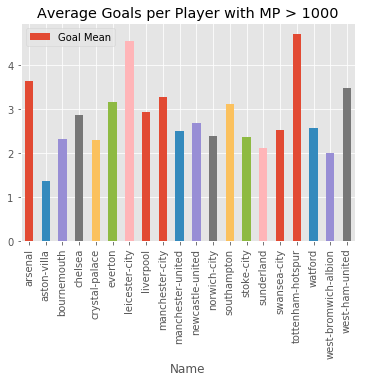

In [408]:
team_stats.plot(x = 'Name', y = 'Goal Mean', kind = 'bar')
plt.title("Average Goals per Player with MP > 1000")
plt.show()

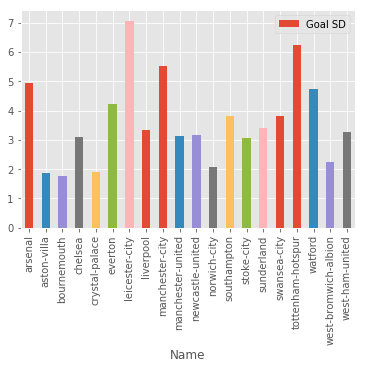

In [402]:
team_stats.plot(x = 'Name', y = 'Goal SD', kind = 'bar')
plt.title("Standard Deviation of Goals per Player with MP > 1000")
plt.show()

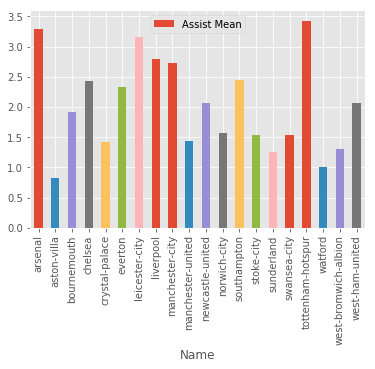

In [404]:
team_stats.plot(x = 'Name', y = 'Assist Mean', kind = 'bar')
plt.title("Average Assists per Player with MP > 1000")
plt.show()

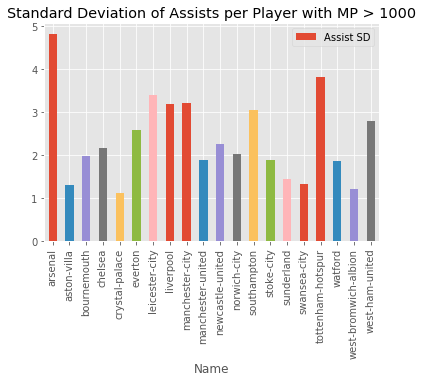

In [409]:
team_stats.plot(x = 'Name', y = 'Assist SD', kind = 'bar')
plt.title("Standard Deviation of Assists per Player with MP > 1000")
plt.show()

# Conclusion
Initially in this report, we can see that salary caps do in fact create more variation in the champions of leagues. This does not seem to be plausible in the Premier League, unless of course the market actually starts to regulate itself. Sadly if we allow this to happen, it will only continue to inflate and inflate football players until they are getting paid absurdly large salaries.

Next I looked at what it takes to win the premier league. My initial hypothesis, because of the results of the initial look into salary caps having less variation in champions, was that wages would be highly correlated with more points. They were linearly correlated, but the data since 2000 did not show that money could buy wins. In fact it only showed that scoring goals and not conceding goals were the best predictors of getting more points, which is obvious. 

The kNN analysis was done next, in order to actually predict whether a team was the champion or in the top 4. The model for the champion was quite poor, partly because of a low about of data and partly because of the different stats of champions. The model to predict the top 4 was quite good, meaning that money was a much better predictor of top 4 than the champions.

Finally in the report I looked into what factors led Leicester City to win the league. Firstly, in the history of Leicester City, we saw that they hovered around 22nd in the english leagues for most of their existence. Then in applying the kNN model, it did not predict them to win, but it did predict them to be in the top 4. This showed me that their statistics were worthy of being champions, since the champions predictor was so flawed. Next I made the assumption that the other big clubs underperformed. In looking at their average points and average goal differential, we saw that Leicester City had the lowest goal differential of a championship team, but was not lacking in points. This meant that they were able to win more games closely and never lose by too much. Then in looking at their distribution of goals and assists, it was unable to be determined whether they played significantly different that other teams. I conclude that Leicester City played extremely well in that magical season, and in a season where the other big clubs failed to find their stride, they were able to take advantage and win. 

In [410]:
db.close()